****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## 1. Find the 10 countries with most projects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

json_df = pd.read_json('data/world_bank_projects.json')

In [2]:
# Check for number of columns and rows in data
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [3]:
# Calculate some statistics from data
json_df.describe().T

,count,mean,std,min,25%,50%,75%,max
approvalfy,500.0,2.013108e+03,7.220656e-01,1999.0,2013.0,2013.0,2013.0,2.015000e+03
grantamt,500.0,4.432400e+06,2.023307e+07,0.0,0.0,0.0,1695000.0,3.650000e+08
ibrdcommamt,500.0,3.286010e+07,1.089197e+08,0.0,0.0,0.0,0.0,1.307800e+09
idacommamt,500.0,3.542136e+07,7.681431e+07,0.0,0.0,0.0,37000000.0,6.000000e+08
lendprojectcost,500.0,1.547241e+08,4.764211e+08,30000.0,6472500.0,35000000.0,102125000.0,5.170000e+09
totalamt,500.0,6.828146e+07,1.242662e+08,0.0,0.0,20000000.0,86250000.0,1.307800e+09
totalcommamt,500.0,7.271386e+07,1.234705e+08,30000.0,5000000.0,25000000.0,90450000.0,1.307800e+09


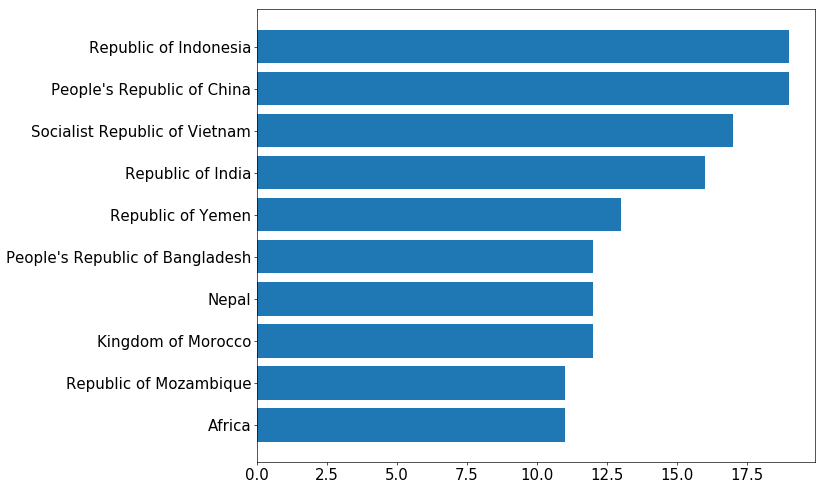

In [4]:
# Plot ten countries with most projects
nprojects = list(json_df['countryname'].value_counts().head(10)[:])
countries = list(json_df['countryname'].value_counts().head(10).index)

nprojects, countries = zip(*sorted(zip(nprojects, countries)))

plt.rcParams['font.size'] = 18.0
fig=plt.figure(figsize=(12, 10), dpi= 60)

plt.barh(range(len(countries)), nprojects)
plt.setp(plt.yticks()[1], rotation=0)

plt.yticks(range(len(countries)), countries, rotation='horizontal')
plt.show()

In [5]:
# List ten countries with most project
json_df['countryname'].value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [6]:
json_string=json.load((open('data/world_bank_projects.json')))
json_normalize(json_string,'mjtheme_namecode')['name'].value_counts().head(11)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

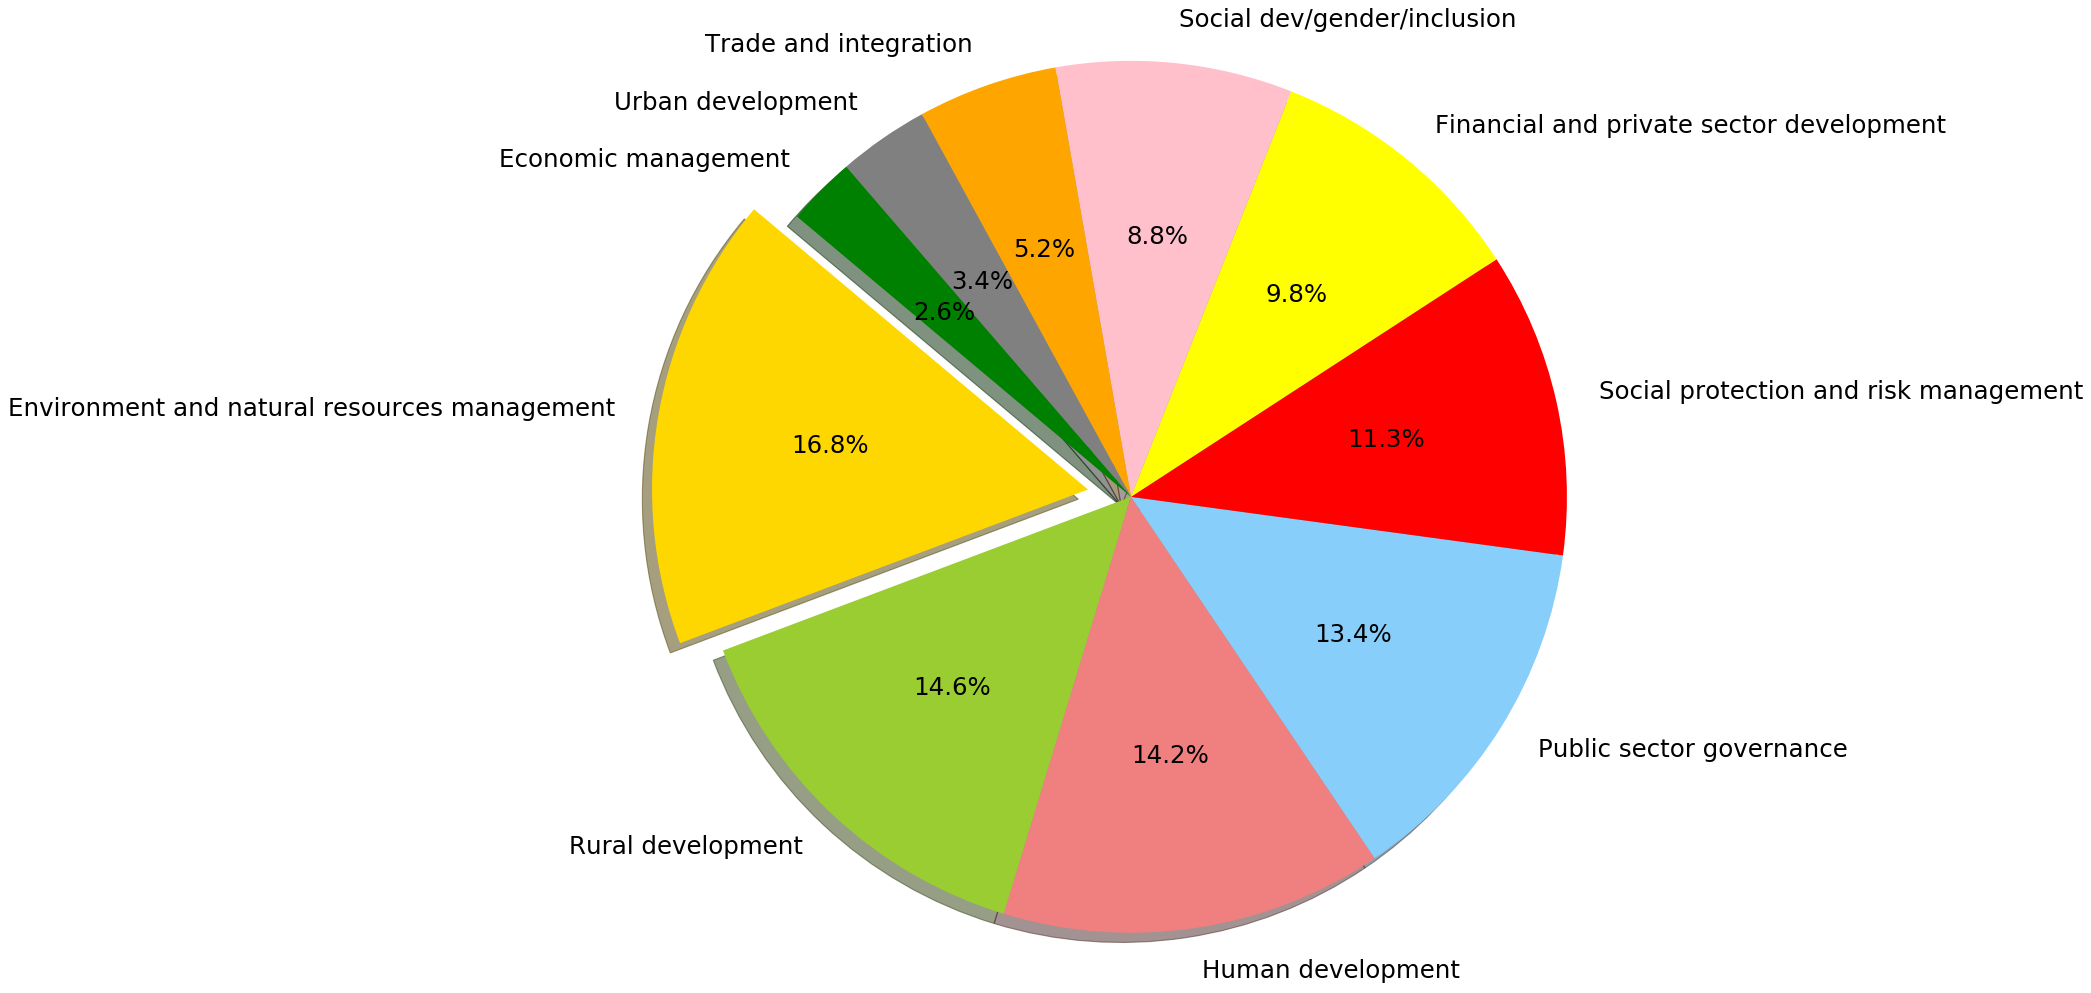

In [7]:
name=json_normalize(json_string,'mjtheme_namecode')['name']
code=json_normalize(json_string, 'mjtheme_namecode')['code']

n = name.loc[name != ''].drop_duplicates()
c = code.loc[name != ''].drop_duplicates()

dictionary = dict(zip(c,n))    
#print(dictionary)

df=pd.DataFrame({'code':code, 'name':name})

for i in range(len(name)):
    if df['name'].iloc[i] == '':
        df['name'].iloc[i] = dictionary[df['code'].iloc[i]]
        
counts = list(df['name'].value_counts().head(10)[:])
labels = list(df['name'].value_counts().head(10).index)
        
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'yellow', 'pink', 'orange', 'gray', 'green']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.rcParams['font.size'] = 22.0
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [8]:
# List top 10 major project themes with missing names filled in. 
df['name'].value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64